# Herbarium Plant Identification Using a Custom CNN


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pathlib
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
train_dir = pathlib.Path(r"C:\Users\swast\Desktop\Project\small-train")
val_dir   = pathlib.Path(r"C:\Users\swast\Desktop\Project\small-validation") 
test_dir  = pathlib.Path(r"C:\Users\swast\Desktop\Project\small-test")


In [1]:
IMG_SIZE = (128, 128)  # smaller size for faster training
BATCH_SIZE = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)

# Normalize pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


NameError: name 'tf' is not defined

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\swast\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,317,540 (12.66 MB)

 Trainable params: 3,317,540 (12.66 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
EPOCHS = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 114s 331ms/step - accuracy: 0.0591 - loss: 4.3635 - val_accuracy: 0.1244 - val_loss: 4.0118
Epoch 2/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 103s 332ms/step - accuracy: 0.1516 - loss: 3.7458 - val_accuracy: 0.2098 - val_loss: 3.4828
Epoch 3/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 104s 336ms/step - accuracy: 0.2713 - loss: 3.0868 - val_accuracy: 0.2513 - val_loss: 3.1914
Epoch 4/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 107s 346ms/step - accuracy: 0.3555 - loss: 2.5789 - val_accuracy: 0.2694 - val_loss: 3.1099
Epoch 5/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 101s 328ms/step - accuracy: 0.4537 - loss: 2.0536 - val_accuracy: 0.2824 - val_loss: 3.2119
Epoch 6/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 99s 320ms/step - accuracy: 0.5410 - loss: 1.6503 - val_accuracy: 0.2876 - val_loss: 3.1796
Epoch 7/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 105s 340ms/step - accuracy: 0.6049 - loss: 1.3677 - val_accuracy: 0.2850 - val_loss: 3.7577
Epoch 8/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 106s 342ms/step - accuracy: 0.6655 - 

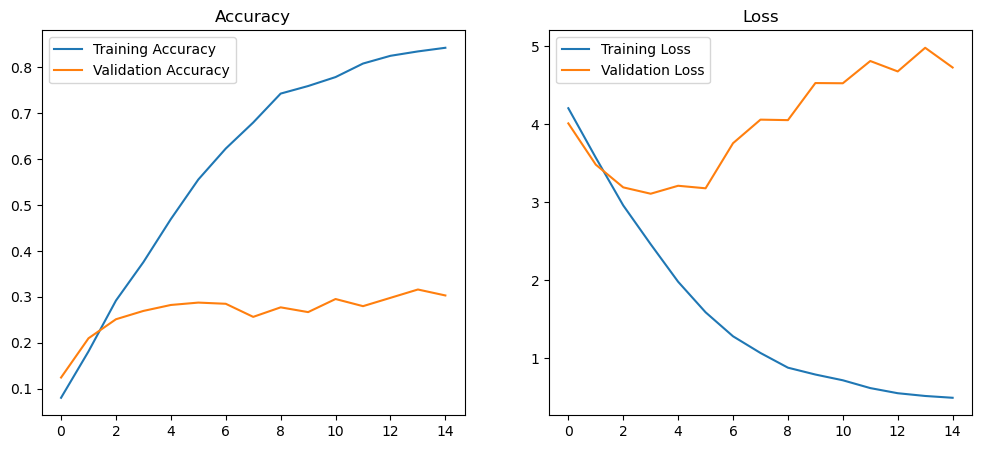

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted: 19_Salpinga secunda Schrank & Mart. ex DC (92.1%)


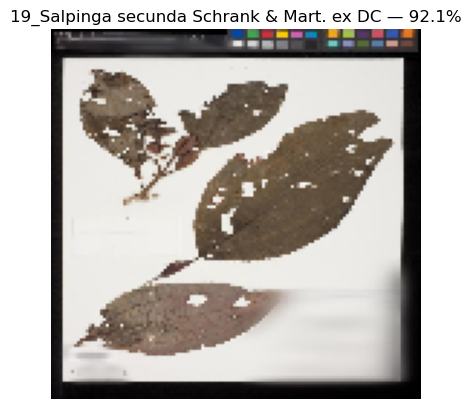

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = image.img_to_array(img)[None, ...] / 255.0
    preds = model.predict(arr)[0]
    i = np.argmax(preds)
    print(f"Predicted: {class_names[i]} ({preds[i]*100:.1f}%)")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{class_names[i]} — {preds[i]*100:.1f}%")
    plt.show()

# 🔍 Predict on image 00005.jpg
predict_image(r"C:\Users\swast\Desktop\Project\small-test\00005.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted: 38_Miconia calvescens DC (87.3%)


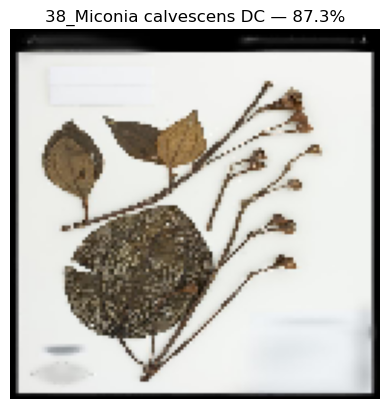

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = image.img_to_array(img)[None, ...] / 255.0
    preds = model.predict(arr)[0]
    i = np.argmax(preds)
    print(f"Predicted: {class_names[i]} ({preds[i]*100:.1f}%)")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{class_names[i]} — {preds[i]*100:.1f}%")
    plt.show()

# 🔍 Predict on image 00005.jpg
predict_image(r"C:\Users\swast\Desktop\Project\small-test\00030.jpg")